In [27]:
from importlib import reload
import random_forest_models
import gradient_boositng_models
import adaboost_models
import xgboost_models

reload(random_forest_models)
reload(gradient_boositng_models)
reload(adaboost_models)
reload(xgboost_models)

from random_forest_models import RandomForestModels
from gradient_boositng_models import GradientBoostingModels
from adaboost_models import AdaBoostModels
from xgboost_models import XGBoostModels

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X_reg, y_reg = make_regression(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    noise=10,
    random_state=42
)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

def get_metrics(original,predicted):

    r2 = round(r2_score(original,predicted),2)
    mse = round(mean_squared_error(original,predicted),2)
    mbe = round(mean_absolute_error(original,predicted),2)

    print("r2 Score ",r2)
    print("Mean Squared Error ",mse)
    print("Mean Absolute Error ",mbe)

    return [r2,mse,mbe]

In [30]:
import pandas as pd

reg_model_metrics_df = pd.DataFrame(columns=['Model','r2 Score','Mean Squared Error','Mean Absolute Error'])
reg_model_metrics_df.set_index('Model', inplace=True)

In [31]:
rf = RandomForestModels()

rf_reg = rf.get_regressor_model(X_train_reg,y_train_reg)
print('Random Forest Regression Model')

reg_model_metrics_df.loc['Random Forest'] = get_metrics(y_train_reg,rf_reg.predict(X_train_reg))

Random Forest Regression Model
r2 Score  0.97
Mean Squared Error  1159.97
Mean Absolute Error  25.68


In [32]:
ada_boost = AdaBoostModels()

ada_reg = ada_boost.get_regressor_model(X_train_reg,y_train_reg)
print('AdaBoost Regression Model')

reg_model_metrics_df.loc['AdaBoost'] = get_metrics(y_train_reg,ada_reg.predict(X_train_reg))

AdaBoost Regression Model
r2 Score  0.74
Mean Squared Error  9969.25
Mean Absolute Error  80.22


In [33]:
gradient_boosting = GradientBoostingModels()

grad_reg = gradient_boosting.get_regressor_model(X_train_reg,y_train_reg)
print('Gradient Boosting Regression Model')

reg_model_metrics_df.loc['Gradient Boosting'] = get_metrics(y_train_reg,grad_reg.predict(X_train_reg))

Gradient Boosting Regression Model
r2 Score  0.99
Mean Squared Error  498.03
Mean Absolute Error  18.11


In [34]:
xgboost = XGBoostModels()
xg_reg = xgboost.get_regressor_model(X_train_reg,y_train_reg)
print('XGBoost Regression Model')

reg_model_metrics_df.loc['XGBoost'] = get_metrics(y_train_reg,xg_reg.predict(X_train_reg))

XGBoost Regression Model
r2 Score  1.0
Mean Squared Error  23.57
Mean Absolute Error  3.39


In [35]:
reg_model_metrics_df

,r2 Score,Mean Squared Error,Mean Absolute Error
Model,,,
Random Forest,0.97,1159.97,25.68
AdaBoost,0.74,9969.25,80.22
Gradient Boosting,0.99,498.03,18.11
XGBoost,1.00,23.57,3.39


In [ ]:
from sklearn.datasets import make_classification

X_cls, y_cls = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    random_state=42
)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

In [37]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

def get_classification_metrics(original,predicted):
    
    acc = round(accuracy_score(original,predicted),2)
    pre = round(precision_score(original,predicted),2)
    rec = round(recall_score(original,predicted),2)

    print("Accuracy ",acc)
    print("Precision ",pre)
    print("Recall ",rec)

    return [acc,pre,rec]

In [38]:
cls_model_metrics_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall'])
cls_model_metrics_df.set_index('Model', inplace=True)

In [39]:
rf_cls = rf.get_classifier_model(X_train_cls,y_train_cls)
print('Random Forest Classification Model')
cls_model_metrics_df.loc['Random Forest'] = get_classification_metrics(y_train_cls,rf_cls.predict(X_train_cls))

Random Forest Classification Model
Accuracy  1.0
Precision  1.0
Recall  1.0


In [40]:
ada_cls = ada_boost.get_classifier_model(X_train_cls,y_train_cls)
print('AdaBoost Classification Model')
cls_model_metrics_df.loc['AdaBoost'] = get_classification_metrics(y_train_cls,ada_cls.predict(X_train_cls))

AdaBoost Classification Model
Accuracy  0.84
Precision  0.82
Recall  0.89


In [41]:
grad_cls = gradient_boosting.get_classifier_model(X_train_cls,y_train_cls)
print('Gradient Boosting Classifier Model')

cls_model_metrics_df.loc['Gradient Boosting'] = get_metrics(y_train_cls,grad_cls.predict(X_train_cls))

Gradient Boosting Classifier Model
r2 Score  0.98
Mean Squared Error  0.01
Mean Absolute Error  0.01


In [42]:
xg_cls = xgboost.get_classifier_model(X_train_cls,y_train_cls)
print('XGBoost Classification Model')

cls_model_metrics_df.loc['XGBoost'] = get_metrics(y_train_cls,xg_cls.predict(X_train_cls))

XGBoost Classification Model
r2 Score  1.0
Mean Squared Error  0.0
Mean Absolute Error  0.0


In [43]:
cls_model_metrics_df

,Accuracy,Precision,Recall
Model,,,
Random Forest,1.00,1.00,1.00
AdaBoost,0.84,0.82,0.89
Gradient Boosting,0.98,0.01,0.01
XGBoost,1.00,0.00,0.00


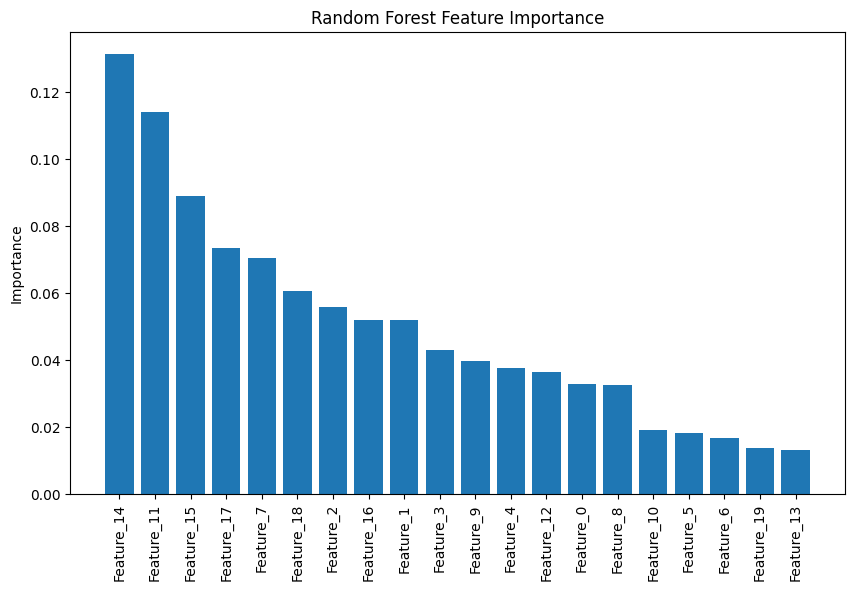

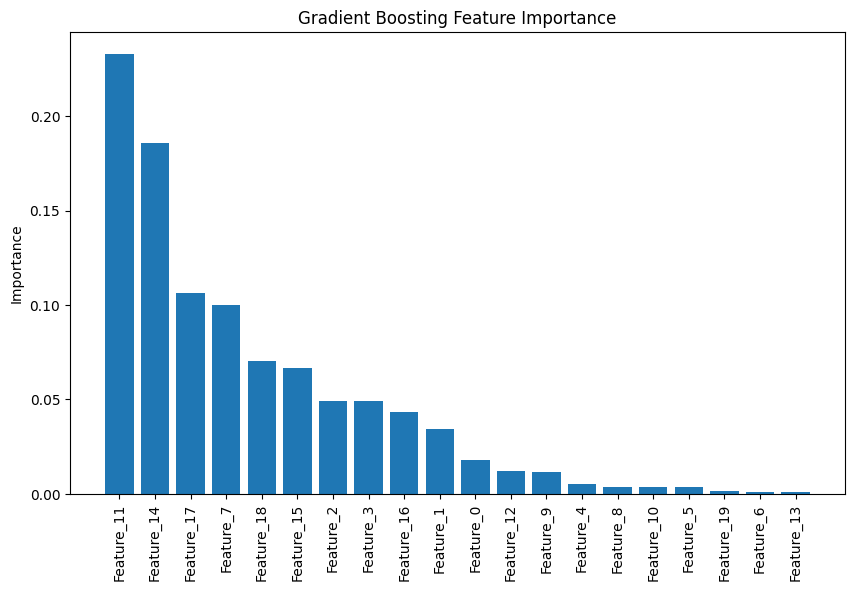

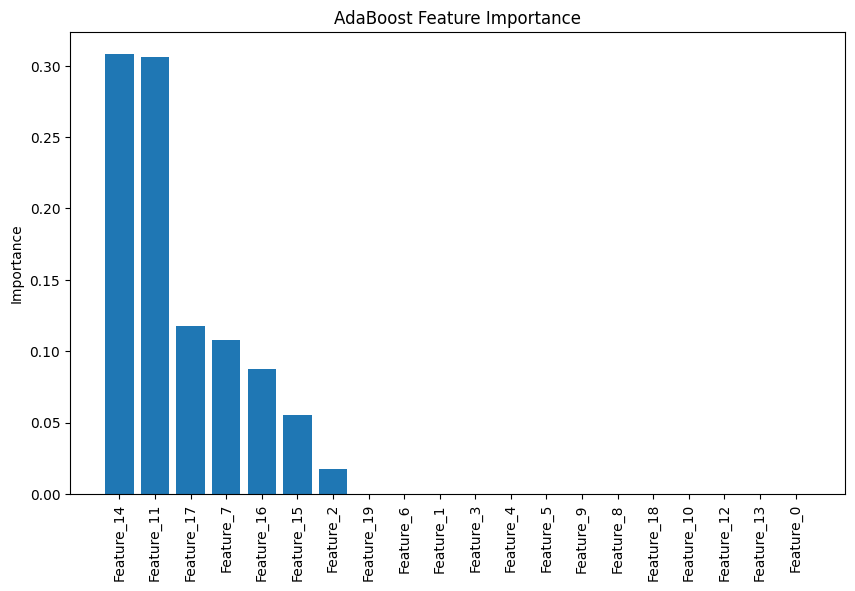

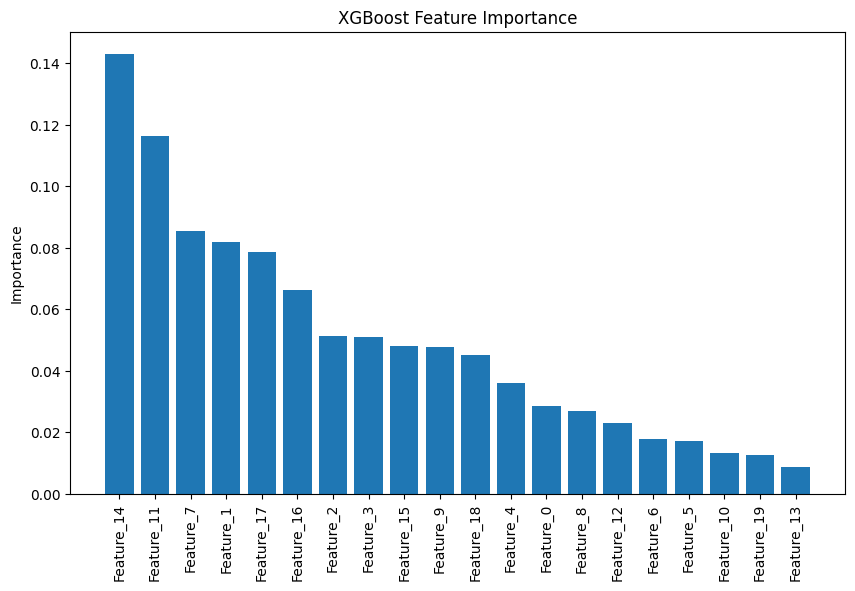

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_feature_importance(model, feature_names, title):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]
    plt.figure(figsize=(10,6))
    plt.title(title)
    plt.bar(range(len(importance)), importance[indices], align='center')
    plt.xticks(range(len(importance)), np.array(feature_names)[indices], rotation=90)
    plt.ylabel("Importance")
    plt.show()

feature_names = [f"Feature_{i}" for i in range(X_train_cls.shape[1])]
plot_feature_importance(rf_cls, feature_names, "Random Forest Feature Importance")
plot_feature_importance(grad_cls, feature_names, "Gradient Boosting Feature Importance")
plot_feature_importance(ada_cls, feature_names, "AdaBoost Feature Importance")
plot_feature_importance(xg_cls, feature_names, "XGBoost Feature Importance")


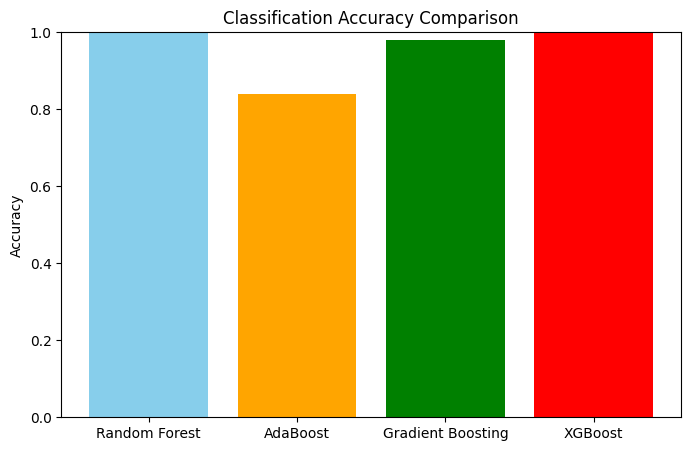

In [46]:
# Classification accuracy comparison
plt.figure(figsize=(8,5))
plt.bar(cls_model_metrics_df.index, cls_model_metrics_df['Accuracy'], color=['skyblue','orange','green','red'])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Classification Accuracy Comparison")
plt.show()
